In [156]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [157]:
n_samples = 5000

def invlogit(x):
    return 1 / (1 + np.exp(-x))

# Generate two features that influence matching
u = np.random.normal(0, 1, n_samples)  # Primary feature (e.g., content similarity)
v = np.random.normal(0, 1, n_samples)  # Secondary feature (e.g., contextual relevance)

# Selection mechanism based on feature combination
S = np.where(u + v > 0.5, 1, 0)  # Item is shown if combination exceeds threshold

mu = -3  + 0.6 * u + 0.4 * v

def simulation(mu):
    scores = np.random.normal(mu, 1)
    probs = 1 / (1 + np.exp(-scores))
    conversions = np.random.binomial(n=1, p=probs)
    results = {
        'scores': scores.reshape(-1,),
        'probabilities': probs.reshape(-1,),
        'conversions': conversions.reshape(-1,)
    }
    return results

result_control = simulation(mu)

In [161]:
np.sum(result_control['conversions'])

398

In [162]:
selected_scores = result_control['scores'][S==1]
survey_threshold = np.percentile(selected_scores, 5)  # bottom 5%

# Create survey response indicator (only for items that were shown)
S_survey = np.zeros_like(S)
# Set S_survey to 1 for shown items (S==1) that are below the threshold
S_survey[S==1] = np.array(result_control['scores'][S==1] <= survey_threshold, dtype=int)

In [168]:

# Create dictionaries for each dataset
data_full = {
    'score': result_control['scores'],
    'conversions': result_control['conversions'],
    'u': u,
    'v': v
}

data_selected = {
    'score': result_control['scores'][S==1],
    'conversions': result_control['conversions'][S==1],
    'u': u[S==1],
    'v': v[S==1]
}

data_survey = {
    'score': result_control['scores'][S_survey==1],
    'conversions': result_control['conversions'][S_survey==1],
    'u': u[S_survey==1],
    'v': v[S_survey==1]
}

# Fit models using formula interface
#model_full = smf.glm('score ~ u + v', data=data_full).fit()
#model_selected = smf.glm('score ~ u + v', data=data_selected).fit()
#model_survey = smf.glm('score ~ u + v', data=data_survey).fit()

model_full = smf.glm('score ~ v', data=data_full).fit()
model_selected = smf.glm('score ~ v', data=data_selected).fit()
model_survey = smf.glm('score ~ v', data=data_survey).fit()

#model_full = smf.glm('conversions ~ v', data=data_full, family=sm.families.Binomial()).fit()
#model_selected = smf.glm('conversions ~ v', data=data_selected, family=sm.families.Binomial()).fit()
#model_survey = smf.glm('conversions ~ v', data=data_survey, family=sm.families.Binomial()).fit()

In [169]:
# Print summary tables
print("=== Full Dataset ===")
print(model_full.summary().tables[1])
print("\n=== Search Selected Data ===")
print(model_selected.summary().tables[1])
print("\n=== Survey Responses ===")
print(model_survey.summary().tables[1])

=== Full Dataset ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9791      0.016   -182.868      0.000      -3.011      -2.947
v              0.3874      0.016     23.587      0.000       0.355       0.420

=== Search Selected Data ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3337      0.033    -69.672      0.000      -2.399      -2.268
v              0.0937      0.031      3.014      0.003       0.033       0.155

=== Survey Responses ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4129      0.053    -82.505      0.000      -4.518      -4.308
v             -0.0275      0.054     -0.514      0.608

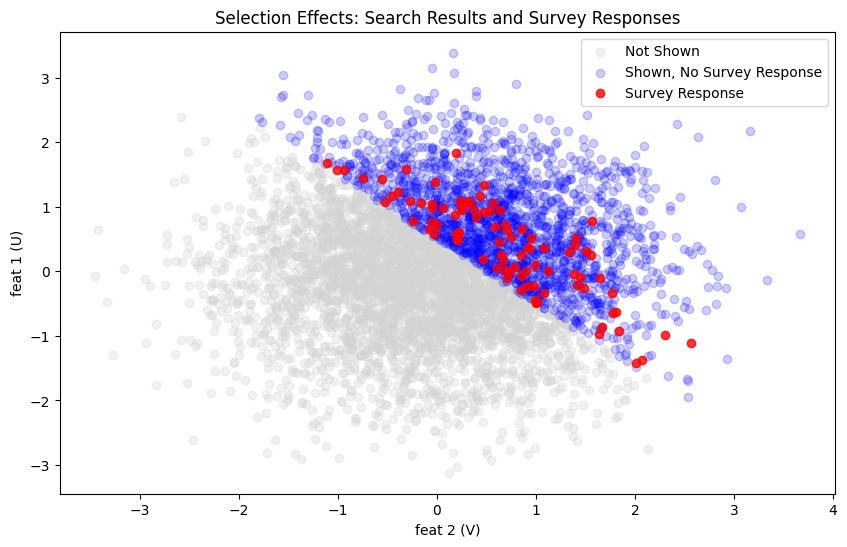

In [170]:
# Create plot with three categories: not shown, shown but no survey, survey response
plt.figure(figsize=(10, 6))
plt.scatter(v[S==0], u[S==0], c='lightgray', alpha=0.3, label='Not Shown')
plt.scatter(v[(S==1) & (S_survey==0)], u[(S==1) & (S_survey==0)], 
           c='blue', alpha=0.2, label='Shown, No Survey Response')
plt.scatter(v[S_survey==1], u[S_survey==1], 
           c='red', alpha=0.8, label='Survey Response')

plt.xlabel('feat 2 (V)')
plt.ylabel('feat 1 (U)')
plt.title('Selection Effects: Search Results and Survey Responses')
plt.legend()
plt.show()

In [148]:
model_full = smf.glm('score ~ u', data=data_full).fit()
model_selected = smf.glm('score ~ u', data=data_selected).fit()
model_survey = smf.glm('score ~ u', data=data_survey).fit()

# Print summary tables
print("=== Full Dataset ===")
print(model_full.summary().tables[1])
print("\n=== Search Selected Data ===")
print(model_selected.summary().tables[1])
print("\n=== Survey Responses ===")
print(model_survey.summary().tables[1])


=== Full Dataset ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9907      0.015   -205.350      0.000      -3.019      -2.962
u              0.8083      0.014     56.132      0.000       0.780       0.836

=== Search Selected Data ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8309      0.034    -84.397      0.000      -2.897      -2.765
u              0.7631      0.030     25.279      0.000       0.704       0.822

=== Survey Responses ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8682      0.155    -18.541      0.000      -3.171      -2.565
u              0.7637      0.164      4.663      0.000

In [141]:
model_full = smf.glm('score ~ u', data=data_full).fit()
model_selected = smf.glm('score ~ u', data=data_selected).fit()
model_survey = smf.glm('score ~ u', data=data_survey).fit()

# Print summary tables
print("=== Full Dataset ===")
print(model_full.summary().tables[1])
print("\n=== Search Selected Data ===")
print(model_selected.summary().tables[1])
print("\n=== Survey Responses ===")
print(model_survey.summary().tables[1])

=== Full Dataset ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9809      0.016   -191.667      0.000      -3.011      -2.950
u              0.5055      0.016     32.190      0.000       0.475       0.536

=== Search Selected Data ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4407      0.032    -75.620      0.000      -2.504      -2.377
u              0.2511      0.030      8.432      0.000       0.193       0.310

=== Survey Responses ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7393      0.151    -18.131      0.000      -3.035      -2.443
u              0.3841      0.170      2.262      0.024

In [171]:
model_full = smf.glm('score ~ u + v', data=data_full).fit()
model_selected = smf.glm('score ~ u + v', data=data_selected).fit()
model_survey = smf.glm('score ~ u + v', data=data_survey).fit()

# Print summary tables
print("=== Full Dataset ===")
print(model_full.summary().tables[1])
print("\n=== Search Selected Data ===")
print(model_selected.summary().tables[1])
print("\n=== Survey Responses ===")
print(model_survey.summary().tables[1])

=== Full Dataset ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9893      0.014   -214.778      0.000      -3.017      -2.962
u              0.6019      0.014     43.037      0.000       0.575       0.629
v              0.3943      0.014     28.097      0.000       0.367       0.422

=== Search Selected Data ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0302      0.051    -59.862      0.000      -3.129      -2.931
u              0.6101      0.035     17.412      0.000       0.541       0.679
v              0.4348      0.035     12.483      0.000       0.367       0.503

=== Survey Responses ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------